# Assignment-1 : Visualizing COVID-19 data

## **Task #4: Smoothing the noisy data**

1. Import necessary packages and functions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter

import glob
import os

2. Read the master table with the cumulative cases.

In [2]:
covid = pd.read_excel("/Users/AyeshaPatnaik/Downloads/UofT/Sem2_Winter-23/CHE1148/Assignment-1/COVID-19-geographic-disbtribution-worldwide-2020-08-27.xlsx")
covid.rename(columns = {'dateRep': 'DateRep', 'day':'Day', 'month':'Month','year':'Year','cases':'Cases','deaths':'Deaths', 'popData2019':'Population', 'countriesAndTerritories': 'Country', 'continentExp':'Continent'}, inplace = True)

3. Perform the groupby aggregation to sum the ’Cases’ and ’Deaths’ over Date and Continent (notice that here we use the original data, not the cumulative).


In [3]:
covid_daily_per_continent = covid.groupby(['DateRep','Continent'])[['Cases', 'Deaths']].sum()
covid_daily_per_continent

Cases  Deaths
DateRep    Continent                
2019-12-31 Africa          0       0
           America         0       0
           Asia           27       0
           Europe          0       0
           Oceania         0       0
...                      ...     ...
2020-08-27 Africa       8870     321
           America    132035    3953
           Asia       103082    1597
           Europe      23931     394
           Oceania       338      24

[1269 rows x 2 columns]

4. Generate the cumulative sum of Cases and Deaths per Continent.

In [4]:
covid_daily_per_continent_cumulative = covid_daily_per_continent.groupby(['Continent']).cumsum()
covid_daily_per_continent.reset_index(inplace=True)
covid_daily_per_continent_cumulative.reset_index(inplace=True)
covid_daily_per_continent_cumulative

,DateRep,Continent,Cases,Deaths
0,2019-12-31,Africa,0,0
1,2019-12-31,America,0,0
2,2019-12-31,Asia,27,0
3,2019-12-31,Europe,0,0
4,2019-12-31,Oceania,0,0
...,...,...,...,...
1264,2020-08-27,Africa,1212699,28609
1265,2020-08-27,America,12910547,455566
1266,2020-08-27,Asia,6529270,133503
1267,2020-08-27,Europe,3522921,207818


5. Generate the global sum aggregation.

In [5]:
covid_daily_global = covid.groupby(['DateRep'])[['Cases', 'Deaths']].sum()
covid_daily_global.reset_index(inplace=True)
covid_daily_global

,DateRep,Cases,Deaths
0,2019-12-31,27,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,17,0
4,2020-01-04,0,0
...,...,...,...
236,2020-08-23,266465,5633
237,2020-08-24,224497,3322
238,2020-08-25,220357,4538
239,2020-08-26,254705,6374


6. Generate the cumulative sum at the global level.

In [6]:
covid_daily_global_cumulative = covid.groupby(['DateRep'])[['Cases', 'Deaths']].sum().cumsum()
covid_daily_global_cumulative.reset_index(inplace=True)
covid_daily_global_cumulative

,DateRep,Cases,Deaths
0,2019-12-31,27,0
1,2020-01-01,27,0
2,2020-01-02,27,0
3,2020-01-03,44,0
4,2020-01-04,44,0
...,...,...,...
236,2020-08-23,23236871,805567
237,2020-08-24,23461368,808889
238,2020-08-25,23681725,813427
239,2020-08-26,23936430,819801


7. Define two functions to convert values of millions and thousands to M and k format, respectively. E.g. 1,000,000 will be represented in the graph as 1M and 1,000 as 1k.


In [7]:
# TO CONVERT THE MILLIONS IN THE Y-AXIS TO 1M, 2M, etc
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0fM' % (x * 1e-6)
formatter_mil = FuncFormatter(millions)

# TO CONVERT THE THOUSANDS IN THE Y-AXIS TO 1K, 2K, etc
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fk' % (x * 1e-3)
formatter_kil = FuncFormatter(thousands)

8. Configure the x-axis ticks format. Here, we want to show the months instead of Day from 100 cases. The format specified here takes care of that.

In [8]:
# TO PLOT MTH IN THE X-AXIS
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

9. Create the data frame with the values on the last day. This will be helpful to annotate the graphs. Also, generate the list of the continents.


In [9]:
last_day_covid = covid_daily_per_continent[covid_daily_per_continent['DateRep'] == covid_daily_per_continent['DateRep'].max()]
last_day_covid_cumulative = covid_daily_per_continent_cumulative[covid_daily_per_continent_cumulative['DateRep'] == covid_daily_per_continent_cumulative['DateRep'].max()]
continents = last_day_covid['Continent'].to_list()

10. Generate the 2×2 subplots of the daily and cumulative cases for continents and globally

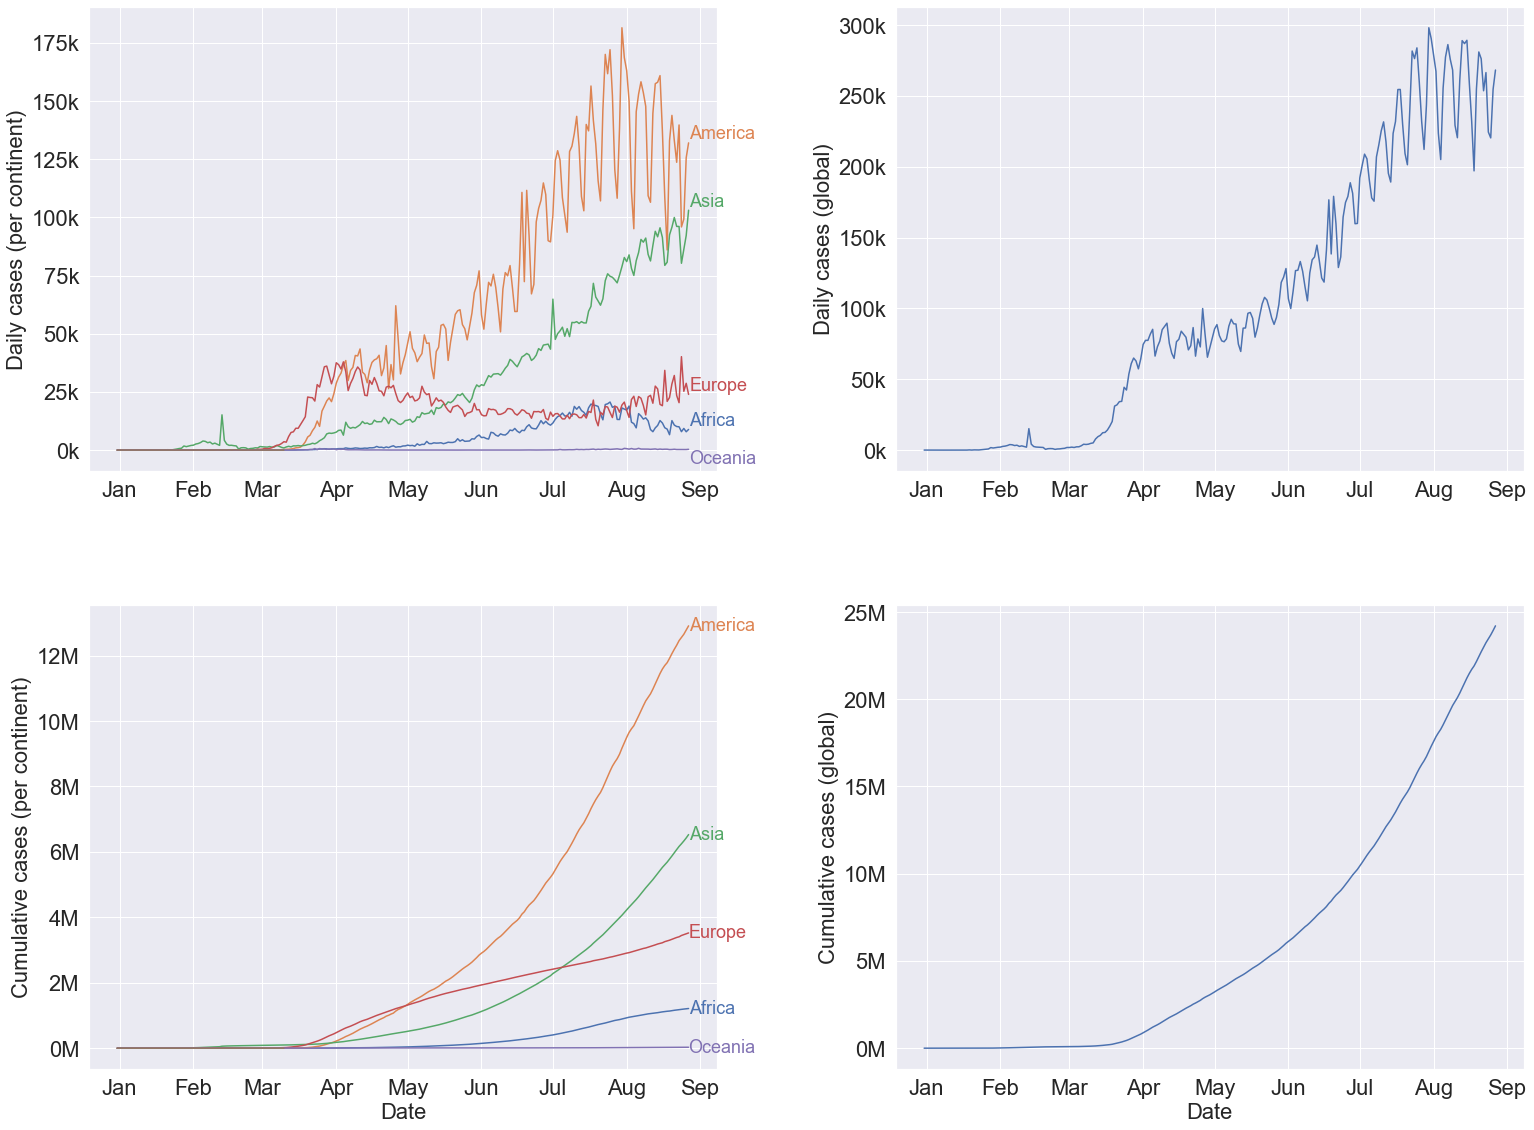

In [10]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent, markers=True, legend=False, ax=axes[0, 0]) #, hue_order=countries_1_5
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
adjust_text(texts1)
axes[0, 0].set_ylabel("Daily cases (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)
fig.tight_layout(h_pad = 4, w_pad=4)

ax2 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative cases (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Daily cases (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative cases (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

#plt.savefig('covid_h_Infection_rate_per_continent.png')

The graphs clearly show a noisy pattern with significant drops every 7 days for Europe and America. This is probably due to reporting being limited in some countries on certain days.
But we see the noise is for daily cases per continent as well as globally. The cumulative daily cases look smooth already. So we'll do the smoothing process for the daily curves only using moving average method with rolling function, as mentioned in the discussion forum.


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
#using rolling function to calculate the moving average for daily cases per continent
africa = covid_daily_per_continent.loc[covid_daily_per_continent["Continent"]=="Africa"]
africa["Slope"]=africa['Cases'].rolling(7).mean()
america = covid_daily_per_continent.loc[covid_daily_per_continent["Continent"]=="America"]
america["Slope"]=america['Cases'].rolling(7).mean()
asia = covid_daily_per_continent.loc[covid_daily_per_continent["Continent"]=="Asia"]
asia["Slope"]=asia['Cases'].rolling(7).mean()
europe = covid_daily_per_continent.loc[covid_daily_per_continent["Continent"]=="Europe"]
europe["Slope"]=europe['Cases'].rolling(7).mean()
oceania = covid_daily_per_continent.loc[covid_daily_per_continent["Continent"]=="Oceania"]
oceania["Slope"]=oceania['Cases'].rolling(7).mean()

In [13]:
#using rolling function to calculate the moving average for daily cases globally
covid_daily_global["Slope"]=covid_daily_global['Cases'].rolling(7).mean()
covid_daily_global

,DateRep,Cases,Deaths,Slope
0,2019-12-31,27,0,NaN
1,2020-01-01,0,0,NaN
2,2020-01-02,0,0,NaN
3,2020-01-03,17,0,NaN
4,2020-01-04,0,0,NaN
...,...,...,...,...
236,2020-08-23,266465,5633,251633.857143
237,2020-08-24,224497,3322,250541.285714
238,2020-08-25,220357,4538,253867.714286
239,2020-08-26,254705,6374,253838.714286


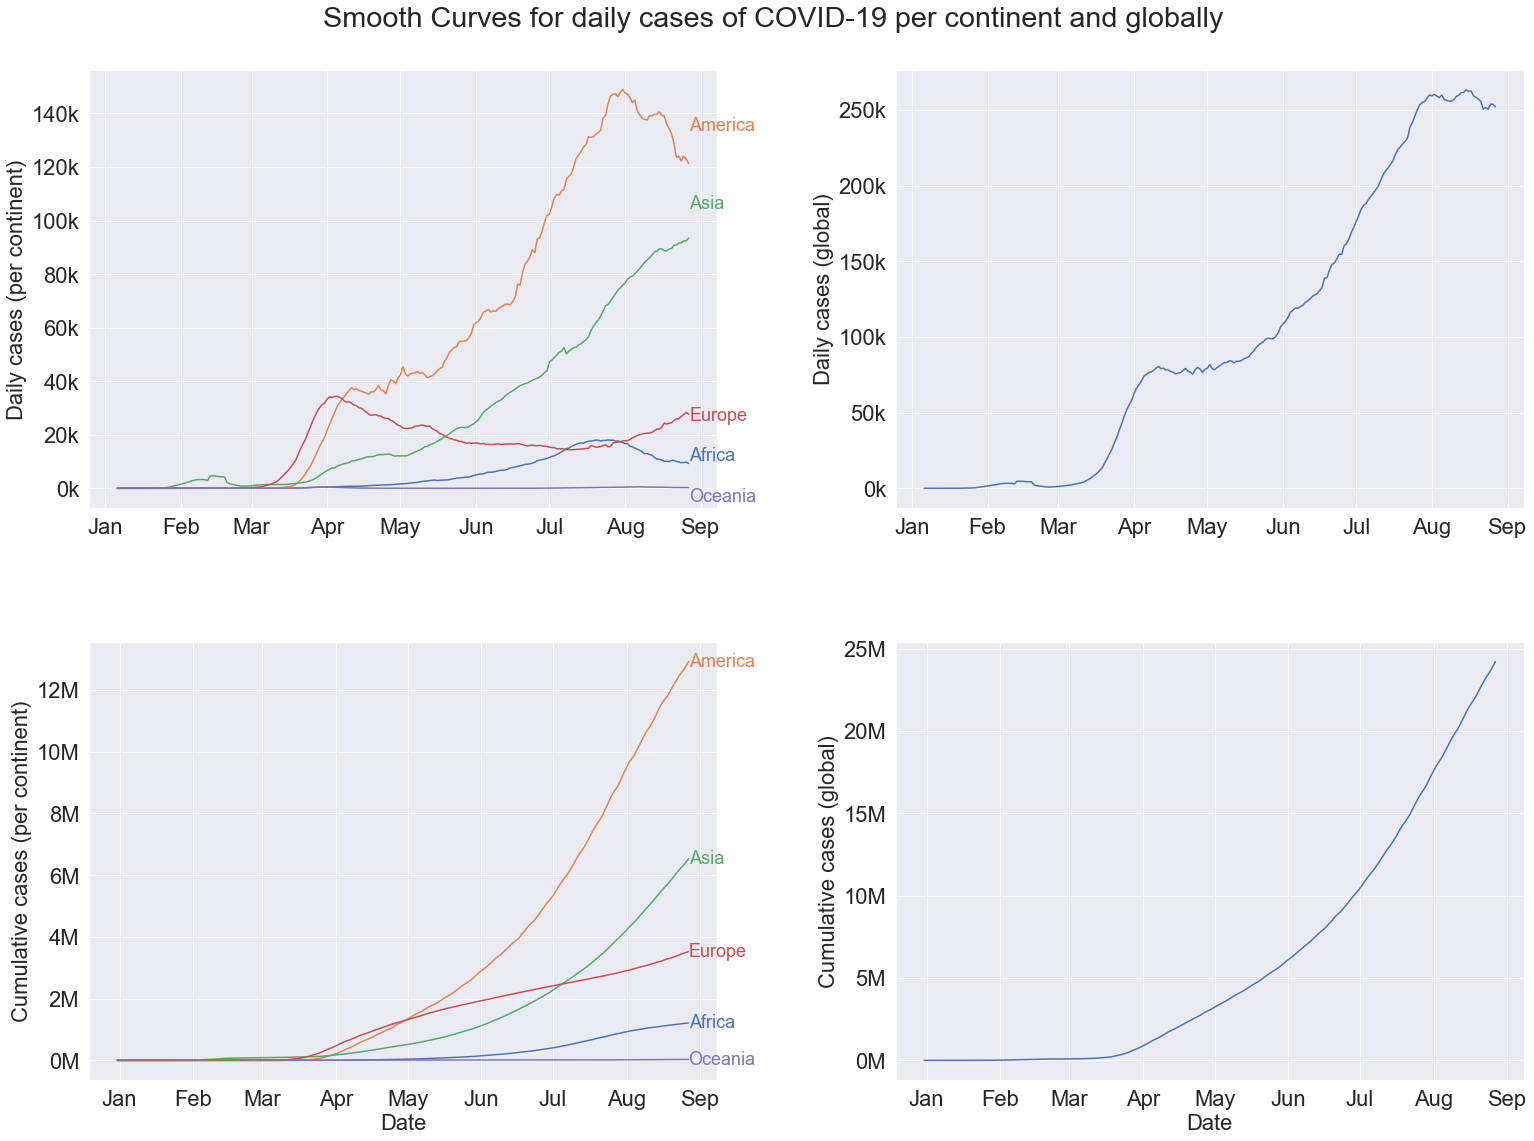

In [14]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)

fig.suptitle("Smooth Curves for daily cases of COVID-19 per continent and globally")

ax1 = sns.lineplot(x="DateRep", y="Slope", data=africa, markers=True, legend=False, ax=axes[0, 0]) 
ax1 = sns.lineplot(x="DateRep", y="Slope",  data=america, markers=True, legend=False, ax=axes[0, 0]) 
ax1 = sns.lineplot(x="DateRep", y="Slope",  data=asia, markers=True, legend=False, ax=axes[0, 0]) 
ax1 = sns.lineplot(x="DateRep", y="Slope",  data=europe, markers=True, legend=False, ax=axes[0, 0]) 
ax1 = sns.lineplot(x="DateRep", y="Slope", data=oceania, markers=True, legend=False, ax=axes[0, 0]) 
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
adjust_text(texts1)
axes[0, 0].set_ylabel("Daily cases (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)
fig.tight_layout(h_pad = 4, w_pad=4)

ax2 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative cases (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="Slope", data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Daily cases (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative cases (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('Fig_4_1_Patnaik_Ayesha.png')

Plotting graphs for daily mortalities per continent and globally:

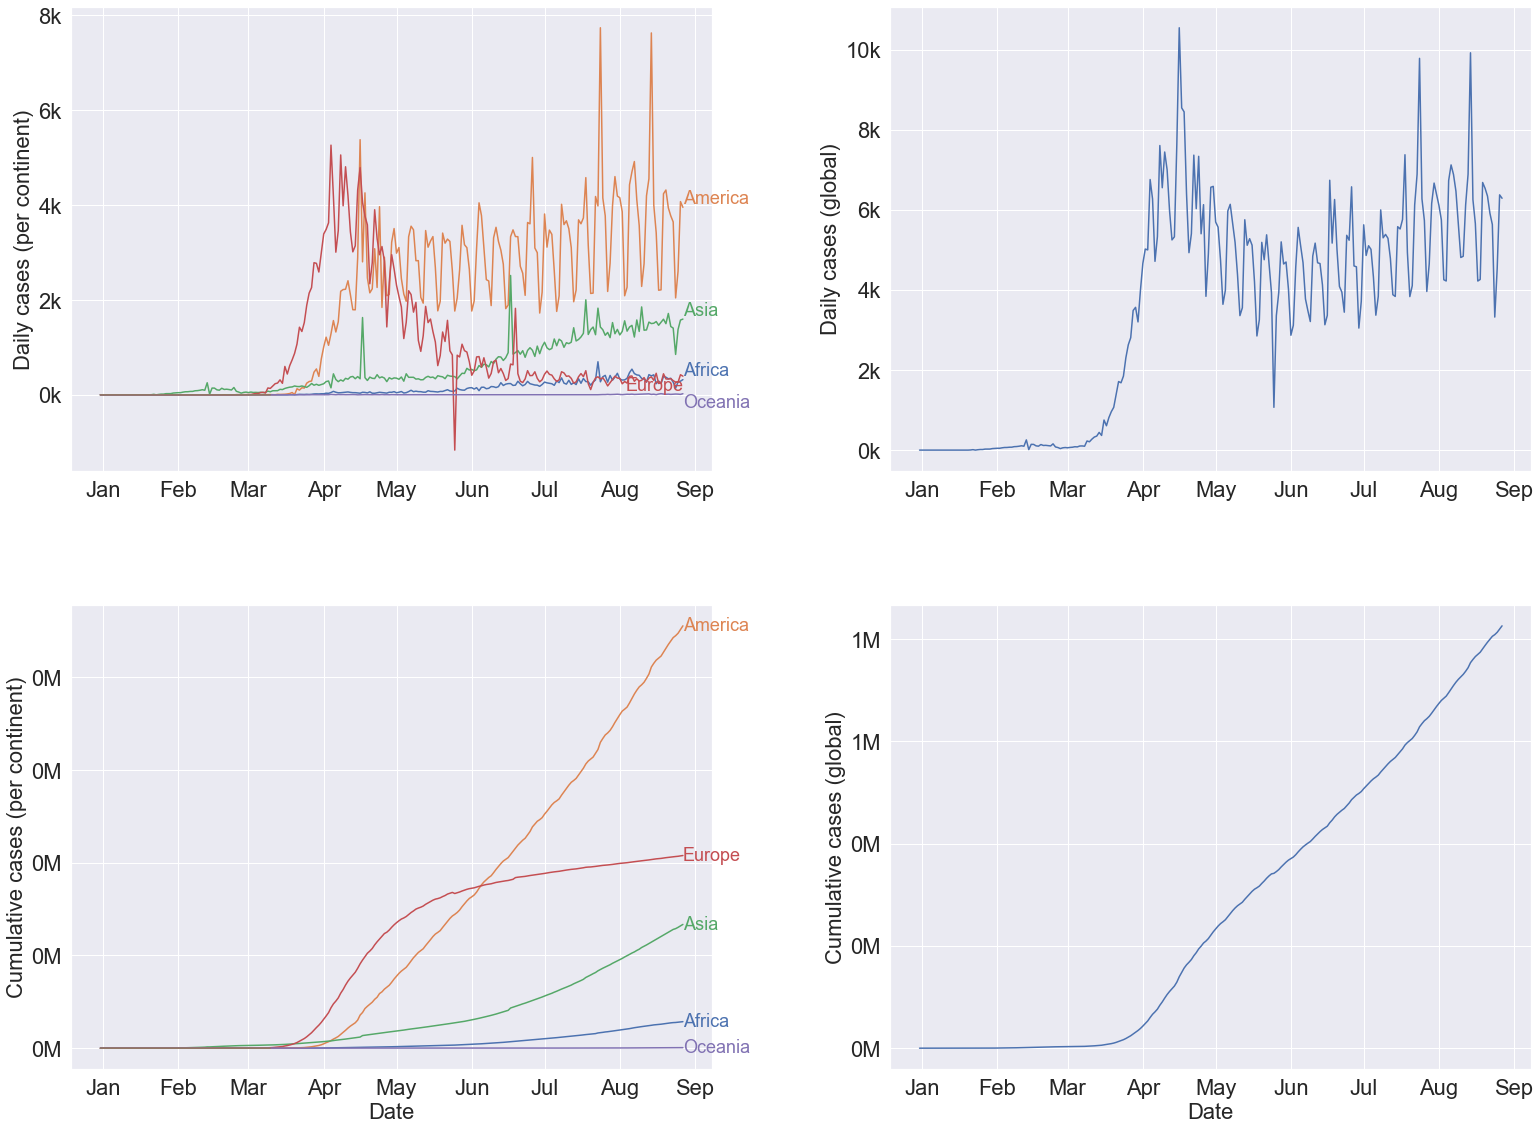

In [15]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x="DateRep", y="Deaths", hue="Continent", data=covid_daily_per_continent, markers=True, legend=False, ax=axes[0, 0]) #, hue_order=countries_1_5
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Deaths'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
adjust_text(texts1)
axes[0, 0].set_ylabel("Daily cases (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)
fig.tight_layout(h_pad = 4, w_pad=4)

ax2 = sns.lineplot(x="DateRep", y="Deaths", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Deaths'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative cases (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="Deaths", data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Daily cases (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Deaths", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative cases (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)



Again we see that the daily mortality cases are not smooth while the cumulative cases are smooth.
So we do the smoothing for the first two plots by using moving average method with rolling function as mentioned in discussion forum.

In [16]:
#using rolling function to calculate the moving average for daily deaths per continent
africa = covid_daily_per_continent.loc[covid_daily_per_continent["Continent"]=="Africa"]
africa["Slope"]=africa['Deaths'].rolling(7).mean()
america = covid_daily_per_continent.loc[covid_daily_per_continent["Continent"]=="America"]
america["Slope"]=america['Deaths'].rolling(7).mean()
asia = covid_daily_per_continent.loc[covid_daily_per_continent["Continent"]=="Asia"]
asia["Slope"]=asia['Deaths'].rolling(7).mean()
europe = covid_daily_per_continent.loc[covid_daily_per_continent["Continent"]=="Europe"]
europe["Slope"]=europe['Deaths'].rolling(7).mean()
oceania = covid_daily_per_continent.loc[covid_daily_per_continent["Continent"]=="Oceania"]
oceania["Slope"]=oceania['Deaths'].rolling(7).mean()

In [17]:
#using rolling function to calculate the moving average for daily cdeaths globally
covid_daily_global["Slope"]=covid_daily_global['Deaths'].rolling(7).mean()
covid_daily_global

,DateRep,Cases,Deaths,Slope
0,2019-12-31,27,0,NaN
1,2020-01-01,0,0,NaN
2,2020-01-02,0,0,NaN
3,2020-01-03,17,0,NaN
4,2020-01-04,0,0,NaN
...,...,...,...,...
236,2020-08-23,266465,5633,5657.000000
237,2020-08-24,224497,3322,5528.428571
238,2020-08-25,220357,4538,5567.857143
239,2020-08-26,254705,6374,5523.714286


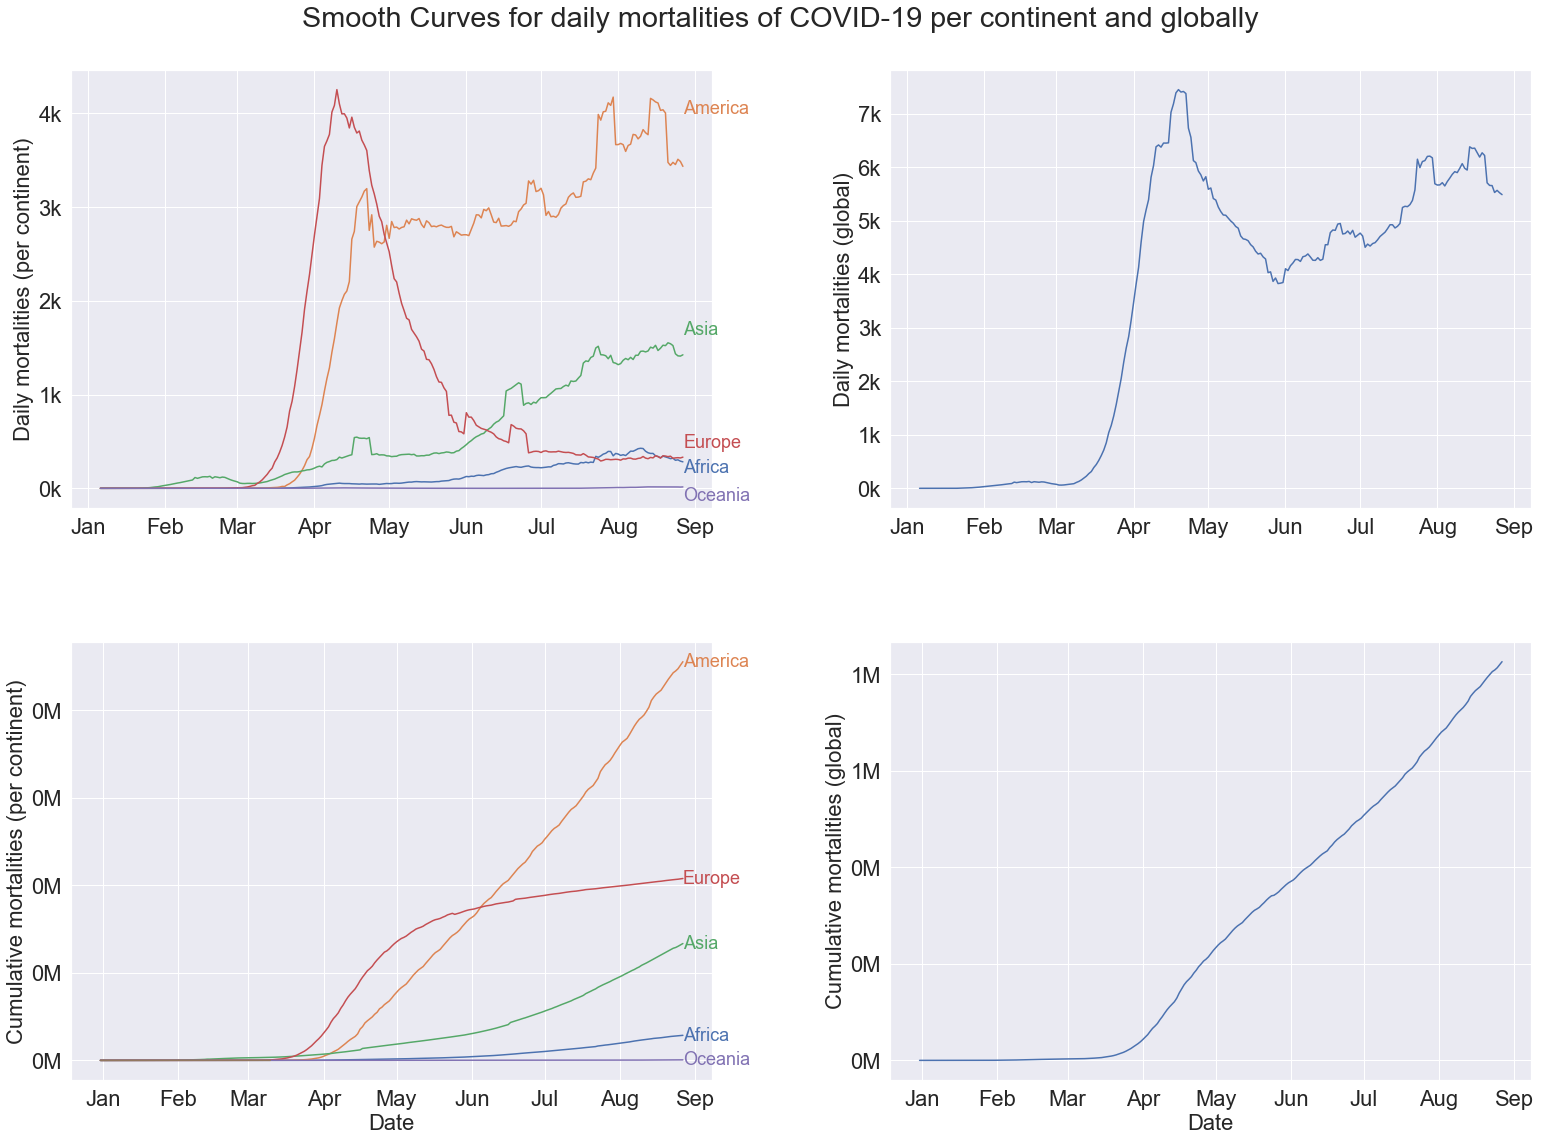

In [18]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)

fig.suptitle("Smooth Curves for daily mortalities of COVID-19 per continent and globally")

ax1 = sns.lineplot(x="DateRep", y="Slope", data=africa, markers=True, legend=False, ax=axes[0, 0]) 
ax1 = sns.lineplot(x="DateRep", y="Slope",  data=america, markers=True, legend=False, ax=axes[0, 0]) 
ax1 = sns.lineplot(x="DateRep", y="Slope",  data=asia, markers=True, legend=False, ax=axes[0, 0]) 
ax1 = sns.lineplot(x="DateRep", y="Slope",  data=europe, markers=True, legend=False, ax=axes[0, 0]) 
ax1 = sns.lineplot(x="DateRep", y="Slope", data=oceania, markers=True, legend=False, ax=axes[0, 0]) 
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Deaths'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
adjust_text(texts1)
axes[0, 0].set_ylabel("Daily mortalities (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)
fig.tight_layout(h_pad = 4, w_pad=4)

ax2 = sns.lineplot(x="DateRep", y="Deaths", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Deaths'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative mortalities (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="Slope", data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Daily mortalities (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Deaths", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative mortalities (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('Fig_4_2_Patnaik_Ayesha.png')